We use Deep network to make the boundary for Concentric circles class. We further use mlxtend library to generate the boundaries for different circles.

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from matplotlib import cm
import random


[0 1 2 3 4]


Text(0.5, 1.0, 'Data')

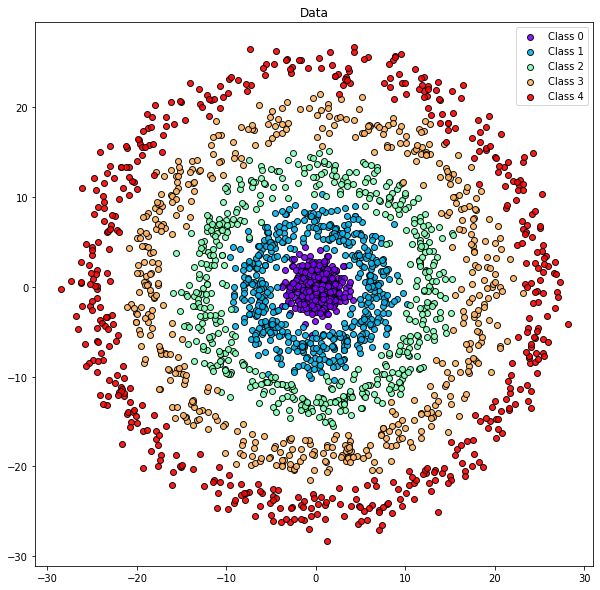

In [2]:
def Circle_con(rad, width, circles, noise , n_samp): 
    num_of_cent = circles
    n_samp = n_samp*num_of_cent
    data = np.zeros((n_samp,2))
    label =  np.zeros(n_samp)
    n_m =  int(n_samp/num_of_cent) 
    aa = np.random.random(n_m) 
    radius = rad
    theta = 2*np.pi*aa   
    for count in range(circles):
        ix = range(n_m*count, n_m*(count + 1))
        data[ix,0] = (radius+count*width)*np.cos(theta)+ np.random.randn(n_m)*noise
        data[ix,1] = (radius+count*width)*np.sin(theta)+ np.random.randn(n_m)*noise  
        label[ix] = count    
    return data,label.astype('int32')  
dataNum = 500
radius_small = 1
width = 6
num = 5
noise = 1.3
X, y = Circle_con(radius_small,width,num,noise,dataNum)
plt.figure(figsize=(10, 10))

y_unique = np.unique(y)
print(y_unique)
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1],
                c=color[np.newaxis, :],
                alpha=0.9, edgecolor='k',
                label="Class %s" % this_y)
plt.legend(loc="best")
plt.title("Data")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
Y_out=len(np.unique(y))
print(X_train.shape, y_train.shape); print(X_test.shape,Y_out)
# Set the input shape
feature_vector_shape = len(X[0])
input_shape = (feature_vector_shape,)
print(f'Feature shape: {input_shape}')

(2000, 2) (2000,)
(500, 2) 5
Feature shape: (2,)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(Y_out)
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 4,677
Trainable params: 4,677
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]
model.compile(loss=loss, optimizer=optim, metrics=metrics)
# training
batch_size = 32
epochs = 50
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2, validation_split = 0.2);

Epoch 1/50
50/50 - 1s - loss: 1.5441 - accuracy: 0.2144 - val_loss: 1.4009 - val_accuracy: 0.2650
Epoch 2/50
50/50 - 0s - loss: 1.3889 - accuracy: 0.3406 - val_loss: 1.3267 - val_accuracy: 0.4075
Epoch 3/50
50/50 - 0s - loss: 1.2962 - accuracy: 0.4087 - val_loss: 1.2514 - val_accuracy: 0.4675
Epoch 4/50
50/50 - 0s - loss: 1.1991 - accuracy: 0.4600 - val_loss: 1.1359 - val_accuracy: 0.4900
Epoch 5/50
50/50 - 0s - loss: 1.0763 - accuracy: 0.5444 - val_loss: 1.0375 - val_accuracy: 0.5800
Epoch 6/50
50/50 - 0s - loss: 0.9680 - accuracy: 0.6181 - val_loss: 0.9380 - val_accuracy: 0.6650
Epoch 7/50
50/50 - 0s - loss: 0.8570 - accuracy: 0.7031 - val_loss: 0.8154 - val_accuracy: 0.6850
Epoch 8/50
50/50 - 0s - loss: 0.7436 - accuracy: 0.7513 - val_loss: 0.7132 - val_accuracy: 0.7725
Epoch 9/50
50/50 - 0s - loss: 0.6642 - accuracy: 0.7887 - val_loss: 0.6297 - val_accuracy: 0.8375
Epoch 10/50
50/50 - 0s - loss: 0.5761 - accuracy: 0.8288 - val_loss: 0.5511 - val_accuracy: 0.8825
Epoch 11/50
50/50 -

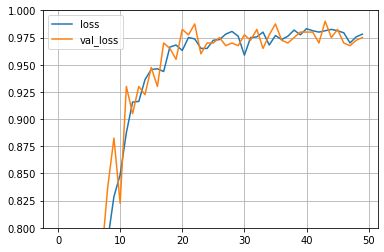

In [6]:
def plot_loss(history):
    plt.plot(history.history['accuracy'], label='loss')
    plt.plot(history.history['val_accuracy'], label='val_loss')
    plt.ylim([0.8, 1])
    plt.legend()
    plt.grid(True)
plot_loss(history)

One hot encoding is used for the boundary plotting.


In [7]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
keras_model_no_ohe = Onehot2Int(model)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:313: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


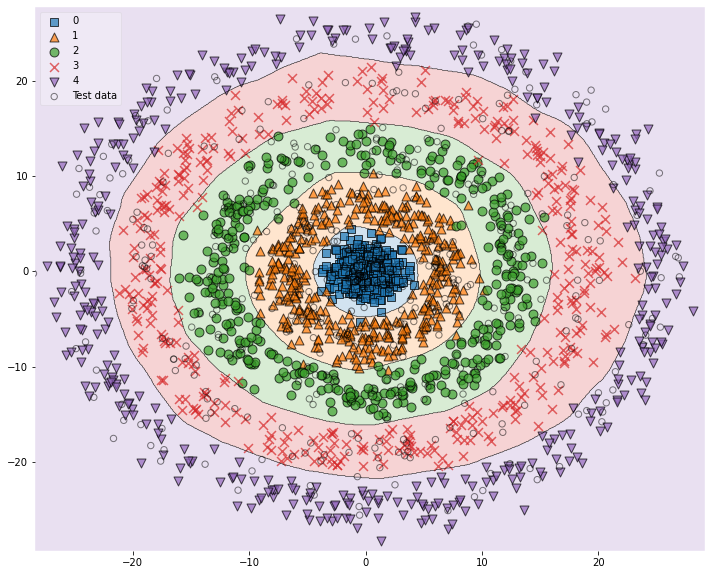

In [8]:
# Plot decision boundary
contourf_kwargs = {'alpha': 0.2}
scatter_kwargs = {'s': 80, 'alpha': 0.7}
scatter_highlight_kwargs = {'s': 40, 'label': 'Test data', 'alpha': 0.5}
fig = plt.figure(figsize=(12,10))
plot_decision_regions(X_train, y_train, clf=keras_model_no_ohe, legend=2, contourf_kwargs = contourf_kwargs, 
                      scatter_kwargs=scatter_kwargs, X_highlight=X_test, scatter_highlight_kwargs= scatter_highlight_kwargs)
plt.show()